# __CAFE SALES ANALYSIS__
***

__Source:__ _https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training?select=dirty_cafe_sales.csv_
<br>

__Overview__

The Dirty Cafe Sales dataset contains 10,000 rows of synthetic data representing sales transactions in a cafe. This dataset is intentionally "dirty," with missing values, inconsistent data, and errors introduced to provide a realistic scenario for data cleaning and exploratory data analysis (EDA). It can be used to practice cleaning techniques, data wrangling, and feature engineering.
<br>

__File Information__

File Name:          _dirty_cafe_sales.csv_ <br>
Number of Rows:     _10,000_ <br>
Number of Columns:  _8_ <br>

***

In [502]:
## Importing libraries
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

## Optional
# import os
# import numpy as np


***

In [503]:
## Importing .csv 
cafe = pd.read_csv("dirty_cafe_sales.csv")
df_cafe = pd.DataFrame(cafe)
df_cafe.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [504]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


***

### 01 _ Data overview and cleaning steps.

#### 01# _ Colums labels overview.

In [505]:
# df_cafe["Price Per Unit"] = df_cafe["Price Per Unit"].astype('float')
# df_cafe.info()

In [506]:
## Columns labels.
col_list = []
for col in df_cafe.columns[:]:
    col_list.append(col)

for el in col_list:
    print(el)

Transaction ID
Item
Quantity
Price Per Unit
Total Spent
Payment Method
Location
Transaction Date


***

#### 01.a _ _"Item"_ & _"Quantity"_ labels value check.

In [507]:
## ITEMS LIST.
df_cafe["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [508]:
## PRICE CHECK PER ITEM.
# item_name = input("Type the item name here:     ")

# item_column = df_cafe[(df_cafe["Item"] == item_name) & (df_cafe["Quantity"] == "1")] 
# item_column

## RESULTS:
##    - PRICES TABLE -   ##
# Coffee        price   2.0
# Cake          price   3.0
# Cookie        price   1.0
# Salad         price   5.0
# Smoothie      price   4.0
# Sandwich      price   4.0
# Juice         price   3.0
# Tea           price   1.5

***

In [509]:
## ITEMS LIST
df_cafe["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [510]:
## UNIQUE VALUES FOR "Quantity" 
df_cafe["Quantity"].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [511]:
## UNIQUE VALUES FOR "Total Spent" 
df_cafe["Total Spent"].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

***

#### 01.b _ _"Item"_ / _"Price Per Unit"_ / _"Quantity"_ / _"Total Spent"_ labels cleaning with data type casting.

In [512]:
## DATA CLEANING 

## Setting correct "Item" prices values  //  df.loc[row, column]
df_cafe.loc[df_cafe["Item"] == "Coffee", "Price Per Unit"] = 2.0
df_cafe.loc[df_cafe["Item"] == "Cake", "Price Per Unit"] = 3.0
df_cafe.loc[df_cafe["Item"] == "Cookie", "Price Per Unit"] = 1.0
df_cafe.loc[df_cafe["Item"] == "Salad", "Price Per Unit"] = 5.0
df_cafe.loc[df_cafe["Item"] == "Smoothie", "Price Per Unit"] = 4.0
df_cafe.loc[df_cafe["Item"] == "Sandwich", "Price Per Unit"] = 4.0
df_cafe.loc[df_cafe["Item"] == "Juice", "Price Per Unit"] = 3.0
df_cafe.loc[df_cafe["Item"] == "Tea", "Price Per Unit"] = 1.5


## Setting correct "Quantity" values  //  df.loc[row, column]
## IF Quantity == "ERROR", "UNKNOWN", "nan" THEN Quantity = 0
df_cafe.loc[df_cafe["Quantity"] == "ERROR", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == "UNKNOWN", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == "nan", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"].isna(), "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == 0.0, "Quantity"] = 1.0


## "Price Per Unit" cleaning.
df_cafe.loc[df_cafe["Price Per Unit"] == "ERROR", "Price Per Unit"] = 0.0
df_cafe.loc[df_cafe["Price Per Unit"] == "UNKNOWN", "Price Per Unit"] = 0.0
df_cafe.loc[df_cafe["Price Per Unit"].isna(), "Price Per Unit"] = 0.0


## "Total Spent" cleaning.
## Converting to number.
df_cafe.loc[df_cafe["Total Spent"] == "ERROR", "Total Spent"] = float(0.0)
df_cafe.loc[df_cafe["Total Spent"] == "UNKNOWN", "Total Spent"] = float(0.0)
df_cafe.loc[df_cafe["Total Spent"].isna(), "Total Spent"] = float(0.0)


## DATA CASTING.
df_cafe["Quantity"] = df_cafe["Quantity"].astype('float')
df_cafe["Price Per Unit"] = df_cafe["Price Per Unit"].astype('float')
df_cafe["Total Spent"] = df_cafe["Total Spent"].astype('float')


df_cafe.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,0.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [513]:
## Calculate correct "Total Spent" values.
df_cafe.loc[df_cafe["Total Spent"] == 0.0, "Total Spent"] = df_cafe["Quantity"] * df_cafe["Price Per Unit"]

In [514]:
## Finding residual "Total Spent" == 0.0 values.
print(df_cafe[df_cafe["Total Spent"] == 0.0].to_string())

     Transaction ID     Item  Quantity  Price Per Unit  Total Spent Payment Method  Location Transaction Date
1761    TXN_3611851      NaN       4.0             0.0          0.0    Credit Card       NaN       2023-02-09
2289    TXN_7524977  UNKNOWN       4.0             0.0          0.0          ERROR       NaN       2023-12-09
4152    TXN_9646000    ERROR       2.0             0.0          0.0            NaN  In-store       2023-12-14


***

#### 01.c _ Checking residual _"ERROR"_, _"UNKNOWN"_ and _NaN_ values in _"Item"_ column.

In [515]:
df_cafe[df_cafe["Item"] == "ERROR"]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
14,TXN_8915701,ERROR,2.0,1.5,3.0,NaN,In-store,2023-03-21
69,TXN_8471743,ERROR,5.0,3.0,15.0,Digital Wallet,In-store,2023-04-06
88,TXN_9487821,ERROR,1.0,5.0,5.0,Digital Wallet,Takeaway,2023-05-24
118,TXN_4633784,ERROR,5.0,0.0,15.0,NaN,In-store,2023-02-06
211,TXN_6717827,ERROR,3.0,5.0,15.0,Digital Wallet,NaN,2023-11-15
...,...,...,...,...,...,...,...,...
9910,TXN_2338617,ERROR,2.0,3.0,6.0,Digital Wallet,UNKNOWN,2023-01-12
9918,TXN_2292088,ERROR,1.0,4.0,4.0,Digital Wallet,Takeaway,2023-03-04
9951,TXN_4122925,ERROR,4.0,1.0,4.0,NaN,Takeaway,2023-10-20
9958,TXN_4125474,ERROR,2.0,5.0,10.0,Credit Card,In-store,2023-08-02


In [516]:
df_cafe[df_cafe["Item"] == "UNKNOWN"]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
31,TXN_8927252,UNKNOWN,2.0,1.0,2.0,Credit Card,ERROR,2023-11-06
33,TXN_7710508,UNKNOWN,5.0,1.0,5.0,Cash,NaN,ERROR
36,TXN_6855453,UNKNOWN,4.0,3.0,12.0,NaN,In-store,2023-07-17
52,TXN_8914892,UNKNOWN,5.0,5.0,25.0,Digital Wallet,NaN,2023-03-15
...,...,...,...,...,...,...,...,...
9764,TXN_1688292,UNKNOWN,3.0,0.0,9.0,Credit Card,In-store,NaN
9777,TXN_4385826,UNKNOWN,2.0,1.5,3.0,Credit Card,Takeaway,2023-08-02
9836,TXN_9162296,UNKNOWN,3.0,4.0,12.0,Cash,In-store,2023-05-10
9946,TXN_8807600,UNKNOWN,1.0,4.0,4.0,Cash,Takeaway,2023-09-24


In [517]:
df_cafe[df_cafe["Item"].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
30,TXN_1736287,NaN,5.0,2.0,10.0,Digital Wallet,NaN,2023-06-02
61,TXN_8051289,NaN,1.0,3.0,3.0,NaN,In-store,2023-10-09
72,TXN_6044979,NaN,1.0,1.0,1.0,Cash,In-store,2023-12-08
89,TXN_4132730,NaN,5.0,1.0,5.0,NaN,In-store,2023-03-12
...,...,...,...,...,...,...,...,...
9820,TXN_8751702,NaN,5.0,0.0,15.0,Cash,NaN,2023-02-13
9855,TXN_3740505,NaN,2.0,1.5,3.0,NaN,NaN,2023-11-21
9876,TXN_3105633,NaN,1.0,2.0,2.0,NaN,In-store,2023-03-30
9885,TXN_4659954,NaN,3.0,4.0,12.0,Credit Card,In-store,NaN


In [518]:
## Creating a list of "ERROR" values indexes. 
error_idx_list = [el for el in df_cafe.index[df_cafe["Item"] == "ERROR"]]
# error_idx_list

In [519]:
## Creating a list of "UNKNOWN" values indexes.
unknown_idx_list = [el for el in df_cafe.index[df_cafe["Item"] == "UNKNOWN"]]
# unknown_idx_list

In [520]:
## Creating a list of "NaN" values indexes.
nan_idx_list = [el for el in df_cafe.index[df_cafe["Item"].isna()]]
# nan_idx_list

In [521]:
## DROPPINg Rows with Item == "ERROR"
for el in error_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
7897,TXN_3042552,UNKNOWN,1.0,3.0,3.0,Cash,NaN,2023-09-08
9869,TXN_1975184,Coffee,1.0,2.0,2.0,Digital Wallet,NaN,2023-01-15
5948,TXN_3478329,Tea,3.0,1.5,4.5,Digital Wallet,In-store,2023-10-29
4319,TXN_3754190,UNKNOWN,3.0,3.0,9.0,Digital Wallet,In-store,UNKNOWN
6430,TXN_3374262,NaN,2.0,1.5,3.0,NaN,In-store,2023-04-14
829,TXN_9018535,Cookie,2.0,1.0,2.0,Digital Wallet,Takeaway,2023-05-05
9666,TXN_7968892,Tea,2.0,1.5,3.0,NaN,In-store,2023-10-02
6914,TXN_6425954,Sandwich,2.0,4.0,8.0,NaN,In-store,2023-03-28
7865,TXN_6658070,Juice,2.0,3.0,6.0,Cash,Takeaway,2023-11-03
2602,TXN_3308378,Cookie,4.0,1.0,4.0,Digital Wallet,NaN,2023-04-28


In [522]:
## DROPPINg Rows with Item == "UNKNOWN"
for el in unknown_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
765,TXN_5740553,Salad,5.0,5.0,25.0,NaN,In-store,2023-08-29
8302,TXN_7975387,Smoothie,1.0,4.0,8.0,Credit Card,Takeaway,2023-03-23
7138,TXN_6071905,Cake,1.0,3.0,3.0,NaN,In-store,2023-11-06
5374,TXN_9576454,Juice,1.0,3.0,3.0,Credit Card,In-store,2023-09-23
529,TXN_2493446,Sandwich,1.0,4.0,4.0,Cash,Takeaway,2023-05-19
6962,TXN_3121483,Salad,2.0,5.0,10.0,NaN,Takeaway,2023-01-06
5016,TXN_3632064,Cookie,5.0,1.0,5.0,Cash,NaN,2023-02-12
817,TXN_4916272,Tea,3.0,1.5,4.5,ERROR,NaN,2023-03-03
7807,TXN_1664563,Smoothie,3.0,4.0,12.0,Cash,NaN,2023-04-28
9129,TXN_3676632,Smoothie,4.0,4.0,16.0,Credit Card,NaN,2023-12-11


In [523]:
## DROPPINg Rows with Item == NaN
for el in nan_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2144,TXN_6626427,Cookie,4.0,1.0,4.0,Digital Wallet,In-store,2023-02-13
577,TXN_5904646,Smoothie,1.0,4.0,4.0,ERROR,ERROR,2023-03-26
1806,TXN_2192787,Sandwich,5.0,4.0,20.0,Cash,In-store,2023-01-01
1839,TXN_4903004,Tea,4.0,1.5,6.0,Digital Wallet,In-store,2023-12-03
2517,TXN_8043642,Salad,4.0,5.0,20.0,Cash,In-store,2023-06-12
5916,TXN_2721997,Cake,3.0,3.0,9.0,NaN,Takeaway,2023-05-20
2827,TXN_5930921,Cookie,2.0,1.0,2.0,Digital Wallet,Takeaway,NaN
5791,TXN_7665695,Tea,3.0,1.5,4.5,ERROR,In-store,2023-10-21
1966,TXN_4089089,Smoothie,5.0,4.0,20.0,NaN,NaN,2023-10-26
1573,TXN_3131761,Smoothie,1.0,4.0,4.0,NaN,Takeaway,2023-10-18


In [524]:
## Check for Dataframe info after data type conversion.
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9031 non-null   object 
 1   Item              9031 non-null   object 
 2   Quantity          9031 non-null   float64
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9031 non-null   float64
 5   Payment Method    6701 non-null   object 
 6   Location          6086 non-null   object 
 7   Transaction Date  8888 non-null   object 
dtypes: float64(3), object(5)
memory usage: 635.0+ KB


#### 01.d _ _"Quantity"_, _"Total Spent"_, _"Price Per Unit"_ ratio calculation.

In [525]:
## FIELDS CALCULATIONS

## "Quantity"
df_cafe.loc[df_cafe["Quantity"] == 1.0, "Quantity"] = df_cafe["Total Spent"] / df_cafe["Price Per Unit"]

## "Total Spent"
df_cafe.loc[df_cafe["Total Spent"] == 0.0, "Total Spent"] = df_cafe["Price Per Unit"] * df_cafe["Quantity"]

## "Price Per Unit"
df_cafe.loc[df_cafe["Price Per Unit"] == 0.0, "Price Per Unit"] = df_cafe["Total Spent"] / df_cafe["Quantity"]


df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4516,TXN_5345258,Salad,2.0,5.0,10.0,Credit Card,Takeaway,2023-03-13
50,TXN_7742742,Cake,5.0,3.0,15.0,NaN,Takeaway,2023-09-05
8416,TXN_3865641,Cake,5.0,3.0,15.0,Digital Wallet,In-store,2023-09-15
8106,TXN_4757873,Tea,1.0,1.5,1.5,Credit Card,In-store,2023-09-12
7338,TXN_5074212,Juice,5.0,3.0,15.0,UNKNOWN,NaN,2023-05-14
2781,TXN_1158197,Coffee,2.0,2.0,4.0,NaN,Takeaway,2023-05-21
6066,TXN_1204426,Sandwich,3.0,4.0,12.0,Credit Card,NaN,2023-01-16
952,TXN_2964638,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-09-28
9171,TXN_9811007,Cookie,5.0,1.0,5.0,Credit Card,NaN,2023-03-07
8398,TXN_3342106,Sandwich,1.0,4.0,4.0,Credit Card,In-store,2023-01-14


In [526]:
## Checking for "Total Spent" values. 
print(f'There are {len(df_cafe[df_cafe["Total Spent"] == 0.0])} values == 0.0')

There are 0 values == 0.0


***

#### 01.e _ Filling _"Item"_ values (__PART 01)__.

In [527]:
##      PRICES TABLE      ##
# Coffee        price   2.0
# Cake          price   3.0
# Cookie        price   1.0
# Salad         price   5.0
# Smoothie      price   4.0
# Sandwich      price   4.0
# Juice         price   3.0
# Tea           price   1.5

In [528]:
## ITEM FIELD COMPLETION

df_cafe.loc[df_cafe["Price Per Unit"] == 1.0, "Item"] = "Cookie"
df_cafe.loc[df_cafe["Price Per Unit"] == 1.5, "Item"] = "Tea"
df_cafe.loc[df_cafe["Price Per Unit"] == 2.0, "Item"] = "Cookie"
# df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Cake"            ## Must be changed after
# df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Juice"           ## Must be changed after
# df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Sandwich"        ## Must be changed after
# df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Smoothies"       ## Must be changed after
df_cafe.loc[df_cafe["Price Per Unit"] == 5.0, "Item"] = "Salad"

df_cafe.sample(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9589,TXN_9688601,Juice,1.0,3.0,3.0,NaN,In-store,2023-10-16
5484,TXN_7704229,Cookie,4.0,2.0,8.0,Cash,NaN,2023-07-15
5316,TXN_5818852,Juice,2.0,3.0,6.0,NaN,NaN,2023-03-04
3813,TXN_5747094,Juice,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-05-11
9988,TXN_9594133,Cake,5.0,3.0,15.0,ERROR,NaN,NaN
8440,TXN_1970180,Cake,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-08-02
6678,TXN_2422584,Tea,1.0,1.5,1.5,Cash,In-store,2023-11-28
9375,TXN_8726874,Sandwich,2.0,4.0,8.0,NaN,Takeaway,2023-09-30
3652,TXN_6068564,Cake,4.0,3.0,12.0,Credit Card,Takeaway,2023-09-28
6147,TXN_6097759,Smoothie,4.0,4.0,16.0,Cash,In-store,2023-06-18


***

#### 01.f _ Filling _"Item"_ values (__PART 02)__.

In [529]:
print(f'Unknown count: {len(df_cafe[df_cafe["Item"] == "UNKNOWN"])} items')

Unknown count: 0 items


In [530]:
print(f'Error count: {len(df_cafe[df_cafe["Item"] == "ERROR"])} items')

Error count: 0 items


In [531]:
print(f'NaN count: {len(df_cafe[df_cafe["Item"].isna()])} items')

NaN count: 0 items


In [532]:
## FIND index FOR Item == "ERROR"
item_series = pd.Series(df_cafe["Item"])

item_idx_list = [el for el in item_series.index[item_series == "ERROR"]]
# item_idx_list

In [533]:
for el in item_idx_list:
    if el % 2 == 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Cake"
    if el % 2 != 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Juice"

df_cafe.sample(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5418,TXN_1781777,Salad,3.0,5.0,15.0,Credit Card,Takeaway,2023-10-26
1426,TXN_5121322,Sandwich,3.0,4.0,12.0,UNKNOWN,In-store,2023-12-17
8724,TXN_9989458,Smoothie,3.0,4.0,12.0,Cash,NaN,2023-02-16
9900,TXN_5967452,Juice,5.0,3.0,15.0,Credit Card,NaN,2023-03-07
7755,TXN_2009782,Salad,5.0,5.0,25.0,Credit Card,ERROR,2023-05-11
528,TXN_9340653,Smoothie,1.0,4.0,4.0,Digital Wallet,NaN,2023-10-19
8549,TXN_6769554,Cookie,5.0,2.0,10.0,Credit Card,Takeaway,2023-02-06
2906,TXN_6684202,Sandwich,1.0,4.0,4.0,NaN,NaN,2023-07-31
4478,TXN_5795475,Tea,3.0,1.5,4.5,Digital Wallet,In-store,2023-09-21
8404,TXN_8228500,Tea,3.0,1.5,4.5,NaN,In-store,2023-04-15


In [534]:
## FIND index FOR Item == "UNKNOWN"
item_idx_unknownlist = [el for el in item_series.index[item_series == "UNKNOWN"]]
item_idx_unknownlist

[]

In [535]:
## Assigning values based on even / odd index number
for el in item_idx_unknownlist:
    if el % 2 == 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Sandwich"
    if el % 2 != 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Smoothies"

# df_cafe

***

#### 01.g _ _"Transaction Date"_ label cleaning.

In [536]:
print(f'There are {len(df_cafe[df_cafe["Transaction Date"] == "UNKNOWN"])} "UNKNOWN" items')

There are 145 "UNKNOWN" items


In [537]:
## Finding MODE tendency for column 
df_cafe["Transaction Date"].mode()

0    UNKNOWN
Name: Transaction Date, dtype: object

In [538]:
df_cafe.sort_values("Transaction Date").sample(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
7740,TXN_2910247,Smoothie,4.0,4.0,16.0,Digital Wallet,NaN,2023-12-02
6286,TXN_6621596,Salad,2.0,5.0,10.0,Credit Card,UNKNOWN,2023-09-25
4060,TXN_6378045,Sandwich,5.0,4.0,20.0,Digital Wallet,In-store,2023-05-07
9025,TXN_2126034,Cookie,4.0,2.0,8.0,Cash,In-store,2023-10-30
7651,TXN_9689507,Salad,3.0,5.0,15.0,Cash,In-store,2023-06-10
8263,TXN_7387416,Juice,3.0,3.0,9.0,Cash,NaN,2023-12-15
1034,TXN_2153529,Cookie,1.0,1.0,1.0,Credit Card,UNKNOWN,2023-09-11
1783,TXN_2864420,Sandwich,1.0,4.0,4.0,NaN,NaN,2023-07-12
5565,TXN_6158518,Cookie,5.0,1.0,5.0,Cash,ERROR,2023-09-28
155,TXN_1909796,Smoothie,2.0,4.0,8.0,NaN,Takeaway,2023-07-12


In [539]:
## Transaction Date == ERROR
print(f'"Transaction Date" Error count: { len(df_cafe[df_cafe["Transaction Date"] == "ERROR"]) }')

"Transaction Date" Error count: 130


In [540]:
## Transaction Date == UNKNOWN
print(f'"Transaction Date" Unknown count: { len(df_cafe[df_cafe["Transaction Date"] == "UNKNOWN"]) }')

"Transaction Date" Unknown count: 145


In [541]:
## Transaction Date == NaN
print(f'"Transaction Date" NaN count: { len(df_cafe[df_cafe["Transaction Date"].isna()]) }')

"Transaction Date" NaN count: 143


In [542]:
## Creating a list with dates in "Transaction Date"
dates_list = []

## Removing "ERROR", "UNKNOWN", NaN values from list
for date in df_cafe["Transaction Date"].dropna():
    if date != "ERROR" and date != "UNKNOWN":
        dates_list.append(date)


# dates_list

In [543]:
## Example for random picking values

test_list = []

i = 0
while i <=9:
    rand_date_value = random.choice(dates_list)
    test_list.append(rand_date_value)
    i += 1

# test_list

In [544]:
## Changing "Trasaction Date" in the cases that values == "ERROR" / "UNKNOWN" / "NaN".
df_cafe.loc[df_cafe["Transaction Date"] == "ERROR", "Transaction Date"] = random.choice(dates_list)
df_cafe.loc[df_cafe["Transaction Date"] == "UNKNOWN", "Transaction Date"] = random.choice(dates_list)
df_cafe.loc[df_cafe["Transaction Date"].isna(), "Transaction Date"] = random.choice(dates_list)

In [545]:
# df_cafe["Transaction Date"].unique()

In [546]:
df_cafe["Transaction Date"] = pd.to_datetime(df_cafe["Transaction Date"])

df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    6701 non-null   object        
 6   Location          6086 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 893.0+ KB


***

#### 01.h _ _"Payment Method"_ cleaning.

In [547]:
df_cafe["Payment Method"].mode()

0    Digital Wallet
Name: Payment Method, dtype: object

In [548]:
df_cafe["Payment Method"].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', nan, 'ERROR'],
      dtype=object)

In [549]:
## Payment Method cleaning
df_cafe.loc[df_cafe["Payment Method"] == "ERROR", "Payment Method"] = "Credit Card"
df_cafe.loc[df_cafe["Payment Method"] == "UNKNOWN", "Payment Method"] = "Digitl Wallet"
df_cafe.loc[df_cafe["Payment Method"].isna(), "Payment Method"] = "Cash"

In [550]:
df_cafe["Payment Method"].unique()

array(['Credit Card', 'Cash', 'Digitl Wallet', 'Digital Wallet'],
      dtype=object)

In [551]:
df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4248,TXN_7153885,Salad,1.0,5.0,5.0,Credit Card,NaN,2023-05-22
5313,TXN_3603434,Cookie,5.0,2.0,10.0,Cash,In-store,2023-01-05
6181,TXN_4458848,Cookie,2.0,1.0,2.0,Cash,In-store,2023-10-30
7710,TXN_1905459,Smoothie,3.0,4.0,12.0,Digital Wallet,NaN,2023-08-18
3758,TXN_4455667,Sandwich,2.0,4.0,8.0,Credit Card,NaN,2023-08-13
7365,TXN_6018020,Cookie,2.0,1.0,2.0,Credit Card,Takeaway,2023-01-12
7066,TXN_5457767,Cake,3.0,3.0,9.0,Cash,In-store,2023-08-14
5828,TXN_7977951,Cake,5.0,3.0,15.0,Cash,NaN,2023-12-22
9116,TXN_3801338,Sandwich,3.0,4.0,12.0,Credit Card,NaN,2023-11-03
7966,TXN_4958354,Sandwich,4.0,4.0,16.0,Credit Card,Takeaway,2023-05-01


***

#### 01.i _ _"Location"_ label cleaning.

In [552]:
df_cafe["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [553]:
df_cafe["Location"].mode()

0    Takeaway
Name: Location, dtype: object

In [554]:
## Location Date == ERROR
print(f'"Location" Error count: { len(df_cafe[df_cafe["Location"] == "ERROR"]) }')

"Location" Error count: 326


In [555]:
## Location Date == UNKNOWN
print(f'"Location" Unknown count: { len(df_cafe[df_cafe["Location"] == "UNKNOWN"]) }')

"Location" Unknown count: 312


In [556]:
## Location Date == NaN
print(f'"Location" NaN count: { len(df_cafe[df_cafe["Location"].isna()]) }')

"Location" NaN count: 2945


In [557]:
## Location cleaning
df_cafe.loc[df_cafe["Location"] == "ERROR", "Location"] = "In-store"
df_cafe.loc[df_cafe["Location"] == "UNKNOWN", "Location"] = "In-store"
df_cafe.loc[df_cafe["Location"].isna(), "Location"] = "Takeaway"

In [558]:
df_cafe["Location"].unique()

array(['Takeaway', 'In-store'], dtype=object)

In [559]:
df_cafe.sample(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6687,TXN_8211303,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-08-26
7882,TXN_9425096,Smoothie,5.0,4.0,20.0,Credit Card,In-store,2023-06-12
1967,TXN_6304285,Cake,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-11-16
4820,TXN_4019040,Tea,1.0,1.5,1.5,Cash,In-store,2023-02-01
6888,TXN_6626928,Sandwich,2.0,4.0,8.0,Cash,In-store,2023-05-10
4509,TXN_4579666,Smoothie,2.0,4.0,8.0,Cash,Takeaway,2023-10-23
5478,TXN_5104848,Tea,2.0,1.5,3.0,Cash,Takeaway,2023-01-22
3453,TXN_5346493,Cookie,5.0,1.0,5.0,Digital Wallet,In-store,2023-04-08
2485,TXN_5403707,Smoothie,3.0,4.0,12.0,Cash,In-store,2023-03-20
8951,TXN_3612790,Smoothie,1.0,4.0,4.0,Cash,Takeaway,2023-09-01


***

#### 01.j _ Creating new column _"Day_of_the_week"_.

In [560]:
## New column creation.
df_cafe["Day_of_the_week"] = df_cafe["Transaction Date"].dt.day_name()

df_cafe.sample(15)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day_of_the_week
8003,TXN_8992377,Cake,4.0,3.0,12.0,Credit Card,Takeaway,2023-07-12,Wednesday
123,TXN_6258471,Cookie,5.0,2.0,10.0,Digital Wallet,In-store,2023-09-23,Saturday
7622,TXN_1103883,Cookie,5.0,1.0,5.0,Credit Card,In-store,2023-08-09,Wednesday
7988,TXN_4749986,Tea,5.0,1.5,7.5,Cash,Takeaway,2023-05-26,Friday
2653,TXN_4036214,Cake,2.0,3.0,6.0,Credit Card,In-store,2023-10-17,Tuesday
1161,TXN_8209794,Cookie,5.0,2.0,10.0,Credit Card,Takeaway,2023-10-25,Wednesday
9594,TXN_6403012,Juice,5.0,3.0,15.0,Cash,In-store,2023-07-23,Sunday
8735,TXN_6744096,Cookie,1.0,2.0,2.0,Digital Wallet,In-store,2023-11-15,Wednesday
3039,TXN_5005592,Cookie,1.0,2.0,2.0,Credit Card,In-store,2023-06-05,Monday
7722,TXN_5424614,Cake,1.0,3.0,3.0,Cash,In-store,2023-11-12,Sunday


In [561]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    9031 non-null   object        
 6   Location          9031 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
 8   Day_of_the_week   9031 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 963.6+ KB


***

#### 01.k _ Labels final check for 0.0 values.

In [562]:
## Decomment for check.
# df_cafe[df_cafe["Quantity"] == 0.0]
# df_cafe[df_cafe["Price Per Unit"] == 0.0]
# df_cafe[df_cafe["Total Spent"] == 0.0]

***

### 02 _ Data visualization.

#### 02.a _ Boxplot printing: ___Total Spent per Item___.

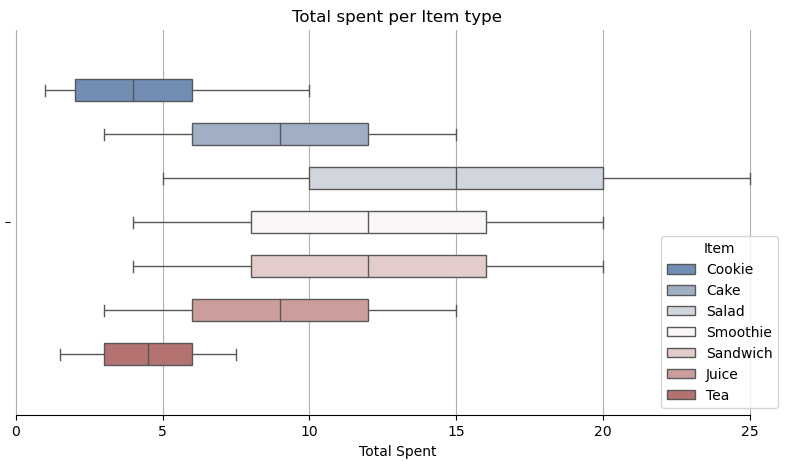

In [563]:
## Boxplot printing

f, ax = plt.subplots(figsize=(10, 5))
# ax.set_xscale("log")

sns.boxplot(df_cafe, x="Total Spent", hue="Item", gap=.5, width=.8, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(title="Total spent per Item type")
sns.despine(trim=True, left=True)

***

#### 02.b _ Scatterplot printing.

In [564]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    9031 non-null   object        
 6   Location          9031 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
 8   Day_of_the_week   9031 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 963.6+ KB


In [565]:
rev_per_item = df_cafe.groupby("Item")["Total Spent"].sum().reset_index()
rev_per_item

,Item,Total Spent
0,Cake,10407.0
1,Cookie,10316.0
2,Juice,10524.0
3,Salad,17355.0
4,Sandwich,13732.0
5,Smoothie,13352.0
6,Tea,4962.0


<Axes: xlabel='Total Spent', ylabel='Price Per Unit'>

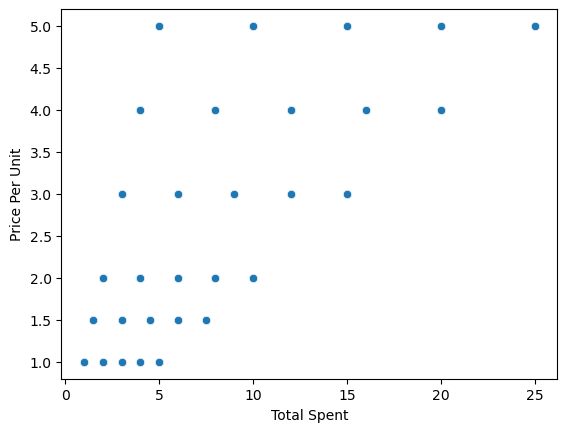

In [566]:
sns.scatterplot(df_cafe, x="Total Spent", y="Price Per Unit")

***

#### 02.b _ Barplot printing: ___2023 Items total revenue___.

In [567]:
rev_per_item = df_cafe.groupby("Item")["Total Spent"].sum()
rev_per_item

Item
Cake        10407.0
Cookie      10316.0
Juice       10524.0
Salad       17355.0
Sandwich    13732.0
Smoothie    13352.0
Tea          4962.0
Name: Total Spent, dtype: float64

C:\Users\danie\AppData\Local\Temp\ipykernel_352\1622122905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_per_item, palette="rocket", ax=ax)


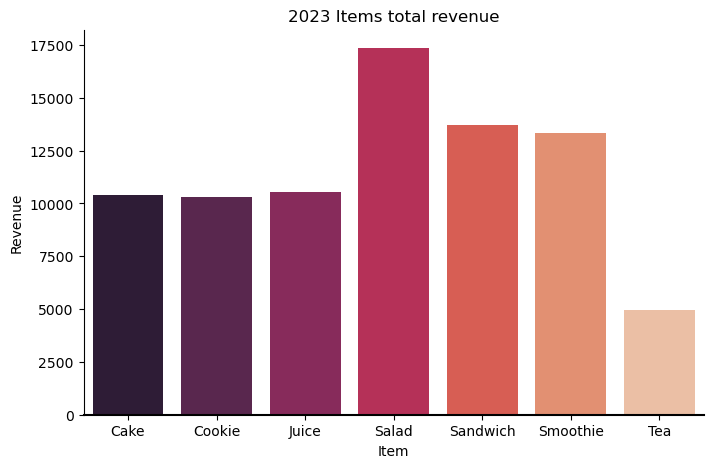

In [568]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5), sharex=True)

sns.barplot(data=rev_per_item, palette="rocket", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Revenue")
ax.set_title("2023 Items total revenue")

sns.despine(bottom=True)

***